In [27]:
# libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import preprocessing
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pylab as plt

# Loading dataset & cleaning dataset

In [28]:
data = pd.read_csv("LC_dataset.csv")
# Data Management
data.fillna(data.mean(), inplace=True)
data_clean = data.dropna()

In [29]:
data.shape

(32, 57)

In [30]:
data.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57
0,0,3,0,1,0,2,2,2,1,1,...,2,2,2,2,1,1,1,2,2,1
1,0,3,3,1,0,3,1,3,1,1,...,2,2,2,2,2,2,1,2,2,1
2,0,3,3,2,0,3,3,3,1,1,...,2,2,2,2,2,2,2,1,2,1
3,0,2,3,2,1,3,3,3,1,2,...,2,2,2,2,2,2,2,2,2,1
4,0,3,2,1,1,3,3,3,2,2,...,2,2,2,2,2,2,1,2,2,1


# Performing PCA

In [31]:
X = data[['P1','P2','P3','P4','P5','P6','P7','P8','P9',
                      'P10','P11','P12','P13','P14','P15','P16','P17',
                      'P18','P19','P20','P21','P22','P23','P24','P25',
                      'P26','P27','P28','P29','P30','P31','P32','P33',
                      'P34','P35','P36','P37','P38','P39','P40','P41',
                      'P42','P43','P44','P45','P46','P47','P48','P49',
                      'P50','P51','P52','P53','P54','P55','P56']]

cn=['P1','P2','P3','P4','P5','P6','P7','P8','P9',
                      'P10','P11','P12','P13','P14','P15','P16','P17',
                      'P18','P19','P20','P21','P22','P23','P24','P25',
                      'P26','P27','P28','P29','P30','P31','P32','P33',
                      'P34','P35','P36','P37','P38','P39','P40','P41',
                      'P42','P43','P44','P45','P46','P47','P48','P49',
                      'P50','P51','P52','P53','P54','P55','P56']
Y = data.P57
df = pd.DataFrame(X, columns=cn)
print(df)
# # normalize data
data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 

# PCA
pca = PCA(n_components=4)
pca.fit_transform(data_scaled)

# summarize components
print('\n\nexplained_variance_ratio_\n')
print(pca.explained_variance_ratio_)  
print('\n\ncomponents_\n')
print(pca.components_)

# components relations with features:
cr = pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2','PC-3','PC-4'])
print('\n\ncomponents relations with features\n')
print(cr.head())
# transpose
cr = cr.T
print('\n\nTRANSPOSED - components relations with features\n')
print(cr.head())
print('\n\n')
print('after pca, selecting top 10 dominant features')
print('\n\nadded a coloumn named sel. This column containd the sum of PC-1, PC-2, PC-3, PC-4')
print('\n\nSorting the dataframe by column "sel"')

cr['sel'] = cr[['PC-1','PC-2','PC-3','PC-4']].sum(axis=1)
cr=cr.sort_values('sel')
print(cr.head())
# saving the data
cr.to_csv('cr.csv')
print('\n\n')


    P1  P2  P3  P4  P5  P6  P7  P8  P9  P10  ...  P47  P48  P49  P50  P51  \
0    0   3   0   1   0   2   2   2   1    1  ...    2    2    2    2    2   
1    0   3   3   1   0   3   1   3   1    1  ...    2    2    2    2    2   
2    0   3   3   2   0   3   3   3   1    1  ...    2    2    2    2    2   
3    0   2   3   2   1   3   3   3   1    2  ...    2    2    2    2    2   
4    0   3   2   1   1   3   3   3   2    2  ...    2    2    2    2    2   
5    0   3   3   2   0   3   3   3   1    2  ...    2    2    2    2    2   
6    0   3   2   1   0   3   3   3   1    2  ...    2    2    2    2    1   
7    0   2   2   1   0   3   1   3   3    3  ...    2    2    1    2    2   
8    0   3   1   1   0   3   1   3   1    1  ...    2    2    2    2    2   
9    0   2   3   2   0   2   2   2   1    2  ...    2    2    2    1    3   
10   0   2   2   0   0   3   2   3   1    1  ...    2    2    2    2    2   
11   0   2   3   2   0   1   2   1   1    2  ...    2    2    2    2    2   

# Top 10 dominant features

In [32]:
cr[-10:]

,PC-1,PC-2,PC-3,PC-4,sel
P53,0.143950,-0.026975,0.209435,0.016623,0.343033
P11,-0.003296,-0.004190,0.194286,0.158914,0.345713
P16,0.029246,0.232092,0.189570,-0.104682,0.346227
P19,0.183516,0.054539,-0.054652,0.207490,0.390893
P52,0.143606,-0.082283,0.215526,0.118404,0.395253
P54,0.144657,0.104610,0.202305,-0.016176,0.435396
P3,0.041664,0.056310,0.127527,0.222439,0.447939
P30,-0.011295,0.165602,0.042457,0.271240,0.468005
P31,0.088130,0.162094,0.223330,0.167564,0.641117
P32,0.088130,0.162094,0.223330,0.167564,0.641117


# Ploting principle components

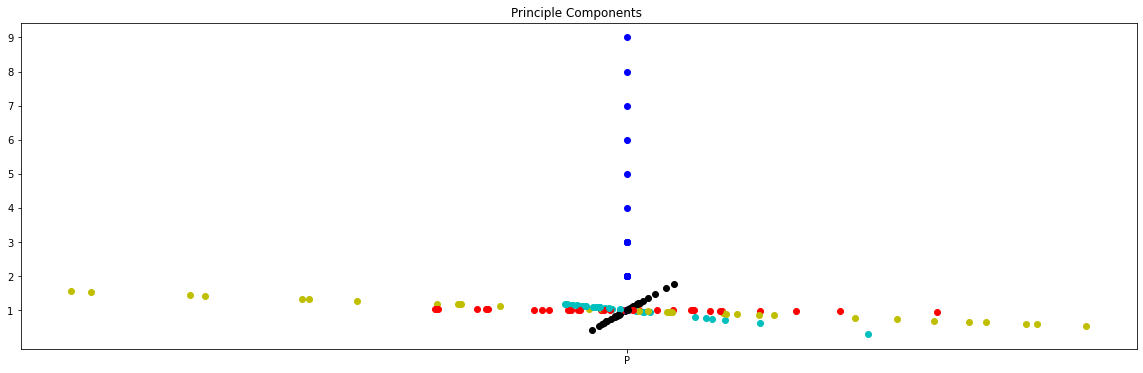

In [33]:
pc1=pca.components_[0]
pc2=pca.components_[1]
pc3=pca.components_[2]
pc4=pca.components_[3]

transformed_data=pca.transform(data_scaled)
plt.figure(figsize=(20,6))
for ii, jj in zip(transformed_data,data_scaled):
    plt.scatter(pc1[0]*ii[0],pc1[1]*ii[0],color='c')
    plt.scatter(pc2[0]*ii[1],pc2[1]*ii[1],color='r')
    plt.scatter(pc3[0]*ii[2],pc3[1]*ii[2],color='y')
    plt.scatter(pc4[0]*ii[3],pc4[1]*ii[3],color='k')
    plt.scatter(jj[0],jj[1],color='b')
    

plt.title('Principle Components ')
plt.show()

# selecting predictors from top 10 features

# Trial 1: taking all 10 features

In [34]:
P = data[[
'P31',
'P32',
'P30',
'P3',
'P54',
'P52',
'P19',
'P16',
'P11',
'P53'

         ]]



T = data.P57

# further preprocessing to improve accuracy
P['P31'] = preprocessing.scale(P['P31'].astype('float64'))
P['P32'] = preprocessing.scale(P['P32'].astype('float64'))
P['P30'] = preprocessing.scale(P['P30'].astype('float64'))
P['P3'] = preprocessing.scale(P['P3'].astype('float64'))
P['P54'] = preprocessing.scale(P['P54'].astype('float64'))
P['P52'] = preprocessing.scale(P['P52'].astype('float64'))
P['P19'] = preprocessing.scale(P['P19'].astype('float64'))
P['P16'] = preprocessing.scale(P['P16'].astype('float64'))
P['P11'] = preprocessing.scale(P['P11'].astype('float64'))
P['P53'] = preprocessing.scale(P['P53'].astype('float64'))



pred_train, pred_test, tar_train, tar_test = train_test_split(P, T, test_size=.5, random_state=123)

P = pred_train
T = tar_train
# Build model on training data
model = SVC(kernel='linear')
model.fit(P, T)
expected = T
predicted = model.predict(P)
print ('svc:', model.score(pred_test, tar_test) * 100, '%')


svc: 43.75 %


# Trial 2: taking top 9

In [35]:
P = data[[
'P31',
'P32',
'P30',
'P3',
'P54',
'P52',
'P19',
'P16',
'P11'


         ]]



T = data.P57

# further preprocessing to improve accuracy
P['P31'] = preprocessing.scale(P['P31'].astype('float64'))
P['P32'] = preprocessing.scale(P['P32'].astype('float64'))
P['P30'] = preprocessing.scale(P['P30'].astype('float64'))
P['P3'] = preprocessing.scale(P['P3'].astype('float64'))
P['P54'] = preprocessing.scale(P['P54'].astype('float64'))
P['P52'] = preprocessing.scale(P['P52'].astype('float64'))
P['P19'] = preprocessing.scale(P['P19'].astype('float64'))
P['P16'] = preprocessing.scale(P['P16'].astype('float64'))
P['P11'] = preprocessing.scale(P['P11'].astype('float64'))



pred_train, pred_test, tar_train, tar_test = train_test_split(P, T, test_size=.5, random_state=123)

P = pred_train
T = tar_train
model = SVC(kernel='linear')
model.fit(P, T)
expected = T
predicted = model.predict(P)
print ('svc:', model.score(pred_test, tar_test) * 100, '%')

svc: 50.0 %


# Trial 3: taking top 8

In [19]:
P = data[[
'P31',
'P32',
'P30',
'P3',
'P54',
'P52',
'P19',
'P16'

         ]]



T = data.P57

# further preprocessing to improve accuracy
P['P31'] = preprocessing.scale(P['P31'].astype('float64'))
P['P32'] = preprocessing.scale(P['P32'].astype('float64'))
P['P30'] = preprocessing.scale(P['P30'].astype('float64'))
P['P3'] = preprocessing.scale(P['P3'].astype('float64'))
P['P54'] = preprocessing.scale(P['P54'].astype('float64'))
P['P52'] = preprocessing.scale(P['P52'].astype('float64'))
P['P19'] = preprocessing.scale(P['P19'].astype('float64'))
P['P16'] = preprocessing.scale(P['P16'].astype('float64'))


pred_train, pred_test, tar_train, tar_test = train_test_split(P, T, test_size=.5, random_state=123)

P = pred_train
T = tar_train
model = SVC(kernel='linear')
model.fit(P, T)
expected = T
predicted = model.predict(P)
print ('svc:', model.score(pred_test, tar_test) * 100, '%')

svc: 87.5 %


# Trial 4: taking top 7

In [20]:
P = data[[
'P31',
'P32',
'P30',
'P3',
'P54',
'P52',
'P19'


         ]]



T = data.P57

# further preprocessing to improve accuracy
P['P31'] = preprocessing.scale(P['P31'].astype('float64'))
P['P32'] = preprocessing.scale(P['P32'].astype('float64'))
P['P30'] = preprocessing.scale(P['P30'].astype('float64'))
P['P3'] = preprocessing.scale(P['P3'].astype('float64'))
P['P54'] = preprocessing.scale(P['P54'].astype('float64'))
P['P52'] = preprocessing.scale(P['P52'].astype('float64'))
P['P19'] = preprocessing.scale(P['P19'].astype('float64'))


pred_train, pred_test, tar_train, tar_test = train_test_split(P, T, test_size=.5, random_state=123)

P = pred_train
T = tar_train
model = SVC(kernel='linear')
model.fit(P, T)
expected = T
predicted = model.predict(P)
print ('svc:', model.score(pred_test, tar_test) * 100, '%')

svc: 75.0 %


# Trial 5: taking top 6

In [36]:
P = data[[
'P31',
'P32',
'P30',
'P3',
'P54',
'P52'


         ]]



T = data.P57

# further preprocessing to improve accuracy
P['P31'] = preprocessing.scale(P['P31'].astype('float64'))
P['P32'] = preprocessing.scale(P['P32'].astype('float64'))
P['P30'] = preprocessing.scale(P['P30'].astype('float64'))
P['P3'] = preprocessing.scale(P['P3'].astype('float64'))
P['P54'] = preprocessing.scale(P['P54'].astype('float64'))
P['P52'] = preprocessing.scale(P['P52'].astype('float64'))



pred_train, pred_test, tar_train, tar_test = train_test_split(P, T, test_size=.5, random_state=123)

P = pred_train
T = tar_train
model = SVC(kernel='linear')
model.fit(P, T)
expected = T
predicted = model.predict(P)
print ('svc:', model.score(pred_test, tar_test) * 100, '%')

svc: 50.0 %


# Result:
# Best combination of features were found in trial 3 yelding accuracy 87.5%  using Support Vector Classifier.

# The selected combination, 'P31','P32','P30','P3','P54','P52','P19','P16'

In [37]:
P = data[['P31','P32','P30','P3','P54','P52','P19','P16']]
T = data.P57
P['P31'] = preprocessing.scale(P['P31'].astype('float64'))
P['P32'] = preprocessing.scale(P['P32'].astype('float64'))
P['P30'] = preprocessing.scale(P['P30'].astype('float64'))
P['P3'] = preprocessing.scale(P['P3'].astype('float64'))
P['P54'] = preprocessing.scale(P['P54'].astype('float64'))
P['P52'] = preprocessing.scale(P['P52'].astype('float64'))
P['P19'] = preprocessing.scale(P['P19'].astype('float64'))
P['P16'] = preprocessing.scale(P['P16'].astype('float64'))
pred_train, pred_test, tar_train, tar_test = train_test_split(P, T, test_size=.5, random_state=123)
P = pred_train
T = tar_train
model = SVC(kernel='linear')
model.fit(P, T)
expected = T
predicted = model.predict(P)
print ('svc:', model.score(pred_test, tar_test) * 100, '%')

svc: 87.5 %


In [38]:
data[['P31','P32','P30','P3','P54','P52','P19','P16','P57']][:5]

,P31,P32,P30,P3,P54,P52,P19,P16,P57
0,1,1,1,0,1,1,0,1,1
1,1,1,1,3,1,2,0,1,1
2,3,3,1,3,2,2,0,1,1
3,3,3,1,3,2,2,0,1,1
4,1,1,1,2,1,2,0,2,1


# Test dataframe

In [24]:
tdf = pd.DataFrame({
    'P31':[3,3,1],
    'P32':[3,3,1],
    'P30':[3,1,1],
    'P3':[3,2,0],
    'P54':[1,1,1],
    'P52':[2,2,1],
    'P19':[2,0,0],
    'P16':[1,1,1]
})
tdf['P31'] = preprocessing.scale(tdf['P31'].astype('float64'))
tdf['P32'] = preprocessing.scale(tdf['P32'].astype('float64'))
tdf['P30'] = preprocessing.scale(tdf['P30'].astype('float64'))
tdf['P3'] = preprocessing.scale(tdf['P3'].astype('float64'))
tdf['P54'] = preprocessing.scale(tdf['P54'].astype('float64'))
tdf['P52'] = preprocessing.scale(tdf['P52'].astype('float64'))
tdf['P19'] = preprocessing.scale(tdf['P19'].astype('float64'))
tdf['P16'] = preprocessing.scale(tdf['P16'].astype('float64'))


In [25]:
tdf

,P31,P32,P30,P3,P54,P52,P19,P16
0,0.707107,0.707107,1.414214,1.069045,0.0,0.707107,1.414214,0.0
1,0.707107,0.707107,-0.707107,0.267261,0.0,0.707107,-0.707107,0.0
2,-1.414214,-1.414214,-0.707107,-1.336306,0.0,-1.414214,-0.707107,0.0


In [39]:
# predicting the data in dataframe
predictions=model.predict(tdf)
predictions

array([2, 1, 2], dtype=int64)